## Web Scraping From Wikipedia.
    List of Nigerian states by population

## Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd

### Getting Page content

In [2]:
url = "http://en.wikipedia.org/wiki/List_of_Nigerian_states_by_population"
page = requests.get(url)
page

<Response [200]>

### Extracting page content using html Parser

In [3]:
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Nigerian states by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4a721c44-95ad-49ff-9f9d-ac416cf8f7c8","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_Nigerian_states_by_population","wgTitle":"List of Nigerian states by population","wgCurRevisionId":1096403415,"wgRevisionId":1096403415,"wgArticleId":2993906,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is differen

### Extracting the list states table using the table tag with the  wikitable... class

In [4]:
table = soup.find("table", class_ = "wikitable")
print(table.prettify())

<table class="wikitable sortable" style="margin: 1em 1em 1em 0; background: #f9f9f9; border: 1px #aaa solid; border-collapse: collapse; font-size: 95%;">
 <tbody>
  <tr bgcolor="#e8e8e8">
   <th align="left" scope="col">
    Rank (2019)
   </th>
   <th align="left" scope="col">
    State
   </th>
   <th scope="col">
    Population (2006)
   </th>
   <th scope="col">
    Population (2019)
   </th>
  </tr>
  <tr>
   <td align="left">
    1
   </td>
   <td align="left">
    <a href="/wiki/Kano_State" title="Kano State">
     Kano State
    </a>
   </td>
   <td align="center">
    9,401,288
   </td>
   <td align="center">
    14,253,549
   </td>
  </tr>
  <tr>
   <td align="left">
    2
   </td>
   <td align="left">
    <a href="/wiki/Lagos_State" title="Lagos State">
     Lagos State
    </a>
   </td>
   <td align="center">
    9,113,605
   </td>
   <td align="center">
    12,772,884
   </td>
  </tr>
  <tr>
   <td align="left">
    3
   </td>
   <td align="left">
    <a href="/wiki/Katsin

### Extracting and Inspecting each table row

In [5]:
# Extracting all the table row using the <tr> tag.
rows = table.find_all("tr")


# Extracting all the table row data  using the <td> and <th> tags.
for row in rows[1:]:
    cells = row.find_all(["td", "th"])
    
    cells_text = [cell.get_text(strip = True) for cell in cells]
    print(cells_text)

['1', 'Kano State', '9,401,288', '14,253,549']
['2', 'Lagos State', '9,113,605', '12,772,884']
['3', 'Katsina State', '5,801,584', '9,300,382']
['4', 'Kaduna State', '6,113,503', '8,324,285']
['5', 'Bauchi State', '4,653,066', '7,540,663']
['6', 'Oyo State', '5,580,894', '7,512,855']
['7', 'Rivers State', '5,198,716', '7,034,973']
['8', 'Jigawa State', '4,361,002', '6,779,080']
['9', 'Niger State', '3,954,772', '6,220,617']
['10', 'Ogun State', '3,751,140', '5,945,275']
['11', 'Sokoto State', '3,702,676', '5,863,187']
['12', 'Benue State', '4,253,641', '5,787,706']
['13', 'Borno State', '4,171,104', '5,751,590']
['14', 'Anambra State', '4,177,828', '5,599,910']
['15', 'Zamfara State', '3,278,873', '5,317,793']
['16', 'Delta State', '4,112,445', '5,307,543']
['17', 'Imo State', '3,927,563', '5,167,722']
['18', 'Kebbi State', '3,256,541', '5,001,610']
['19', 'Ondo State', '3,460,877', '4,969,707']
['20', 'Akwa Ibom State', '3,902,051', '4,780,581']
['21', 'Adamawa State', '3,178,950', '4

### Converting to a .csv file

In [6]:
with open("List_of_Nigerian_states.csv", "w", encoding = "utf8", newline = '') as f:
    thewriter = writer(f)
    header = ['Rank (2019)', 'State', 'Population (2006)', 'Population (2019)']
    thewriter.writerow(header)
    
    for row in rows[1:]:
        cells = row.find_all(["td", "th"])
        
        cells_text = [cell.get_text(strip = True) for cell in cells]
        thewriter.writerow(cells_text)

### Confirm by importing data

In [7]:
data = pd.read_csv("List_of_Nigerian_states.csv", index_col = 'Rank (2019)')
data.head(10)

,State,Population (2006),Population (2019)
Rank (2019),,,
1,Kano State,"9,401,288","14,253,549"
2,Lagos State,"9,113,605","12,772,884"
3,Katsina State,"5,801,584","9,300,382"
4,Kaduna State,"6,113,503","8,324,285"
5,Bauchi State,"4,653,066","7,540,663"
6,Oyo State,"5,580,894","7,512,855"
7,Rivers State,"5,198,716","7,034,973"
8,Jigawa State,"4,361,002","6,779,080"
9,Niger State,"3,954,772","6,220,617"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to Total
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Population (2006)  38 non-null     object
 2   Population (2019)  38 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data

,State,Population (2006),Population (2019)
Rank (2019),,,
1,Kano State,"9,401,288","14,253,549"
2,Lagos State,"9,113,605","12,772,884"
3,Katsina State,"5,801,584","9,300,382"
4,Kaduna State,"6,113,503","8,324,285"
5,Bauchi State,"4,653,066","7,540,663"
6,Oyo State,"5,580,894","7,512,855"
7,Rivers State,"5,198,716","7,034,973"
8,Jigawa State,"4,361,002","6,779,080"
9,Niger State,"3,954,772","6,220,617"


In [11]:
a=data[['State','Population (2006)']]
b= a.sort_values('Population (2006)').tail(5)
b
#investing the top 5 most populous states in 2006

,State,Population (2006)
Rank (2019),,
6,Oyo State,"5,580,894"
3,Katsina State,"5,801,584"
4,Kaduna State,"6,113,503"
2,Lagos State,"9,113,605"
1,Kano State,"9,401,288"


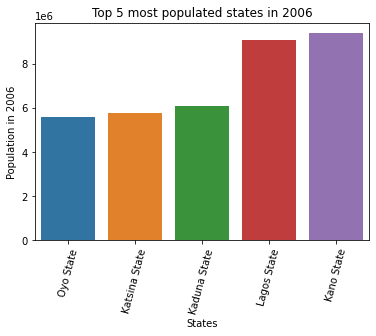

In [12]:
#visualing the 2006 most populated states
sns.barplot(x=['Oyo State','Katsina State','Kaduna State','Lagos State','Kano State'],
            y=[5580894,5801584,6113503,9113605,9401288])
plt.xlabel('States')
plt.ylabel('Population in 2006')
plt.xticks(rotation=75)
plt.title('Top 5 most populated states in 2006')
plt.show()

In [13]:
c=data[['State','Population (2019)']]
d= c.sort_values('Population (2019)').tail(5)
d

,State,Population (2019)
Rank (2019),,
7,Rivers State,"7,034,973"
6,Oyo State,"7,512,855"
5,Bauchi State,"7,540,663"
4,Kaduna State,"8,324,285"
3,Katsina State,"9,300,382"


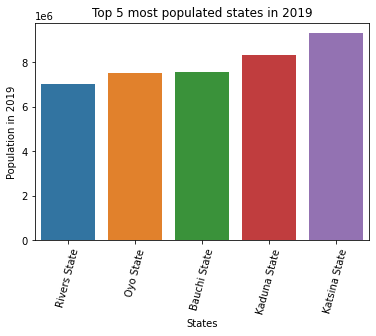

In [14]:
#visualing the 2019 most populated states
sns.barplot(x=['Rivers State','Oyo State','Bauchi State','Kaduna State','Katsina State'],
            y=[7034973,7512855,7540663,8324285,9300382])
plt.xlabel('States')
plt.ylabel('Population in 2019')
plt.xticks(rotation=75)
plt.title('Top 5 most populated states in 2019')
plt.show()

In [15]:
data.describe()

,State,Population (2006),Population (2019)
count,38,38,38
unique,38,38,38
top,Kano State,"9,401,288","14,253,549"
freq,1,1,1


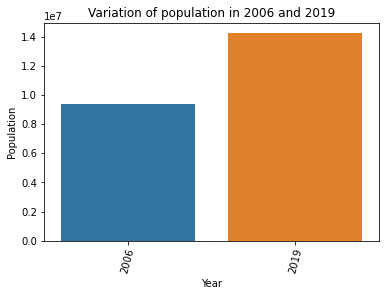

In [16]:
#visualing the variation of population in 2006 and 2019
sns.barplot(x=['2006','2019'],
            y=[9401288,14253549])
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=75)
plt.title('Variation of population in 2006 and 2019')
plt.show()